------------------------------2.1分类与回归------------------------------
------------------------------2.2泛化、过拟合与欠拟合------------------------------
------------------------------2.3监督学习算法------------------------------
------------------------------2.3.1一些样本数据集------------------------------
X.shape: (26, 2)
cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Shape of cancer data: (569, 30)
Sample counts per class: 
{'malignant': 212, 'benign': 357}
Feature names: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactne

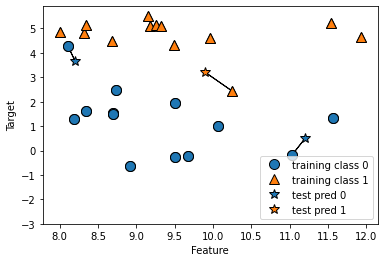

In [1]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer, load_boston
import warnings
warnings.filterwarnings('ignore')


print('--' * 15 + '2.1分类与回归' + '--' * 15)
print('--' * 15 + '2.2泛化、过拟合与欠拟合' + '--' * 15)
print('--' * 15 + '2.3监督学习算法' + '--' * 15)
print('--' * 15 + '2.3.1一些样本数据集' + '--' * 15)

X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['class 0', 'class 1'], loc=4)
plt.xlabel('First feature')
plt.ylabel('Second feature')
print('X.shape: {}'.format(X.shape))
# plt.show()


X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('Target')
# plt.show()

cancer = load_breast_cancer()
print('cancer.keys(): \n{}'.format(cancer.keys()))

print('Shape of cancer data: {}'.format(cancer.data.shape))

print('Sample counts per class: \n{}'.format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

print('Feature names: \n{}'.format(cancer.feature_names))

boston = load_boston()
print('Data shape: {}'.format(boston.data.shape))

X, y = mglearn.datasets.load_extended_boston()
print('X.shape: {}'.format(X.shape))

print('--' * 15 + '2.3.2k近邻' + '--' * 15)

mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.show()

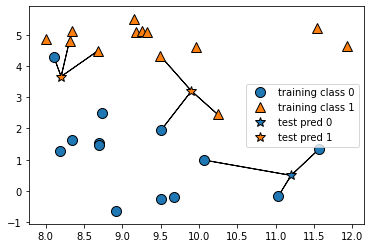

In [2]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [3]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [6]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [7]:
print('Test set predictions: {}'.format(clf.predict(X_test)))

Test set predictions: [1 0 1 1 1 0 0]


In [8]:
print('Test set accuracy: {:.2f}'.format(clf.score(X_test, y_test)))

Test set accuracy: 1.00


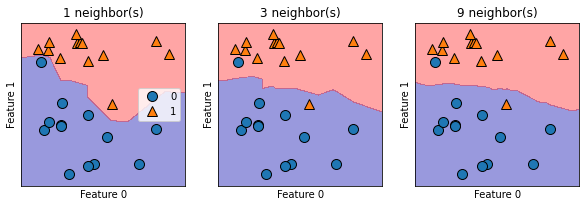

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
axes[0].legend()
plt.show()

As you can see on the left in the figure, using a single neighbor results in a decision boundary that follows the training data closely. Considering more and more neighbors leads to a smoother decision boundary. A smoother boundary corresponds to a simpler model. In other words, using few neighbors corresponds to high model complexity (as shown on the right side of Figure 2-1), and using many neighbors corresponds to low model complexity (as shown on the left side of Figure 2-1). If you consider the extreme case where the number of neighbors is the number of all data points in the training set, each test point would have exactly the same neighbors (all training points) and all predictions would be the same: the class that is most frequent in the training set.

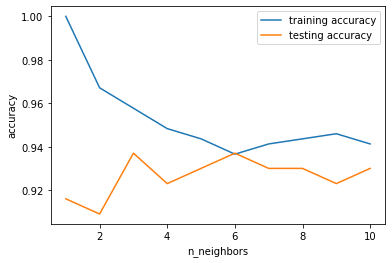

In [10]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    stratify=cancer.target, 
                                                    random_state=39)
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)
for n_neighbor in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbor)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='testing accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### k-neighbors regression

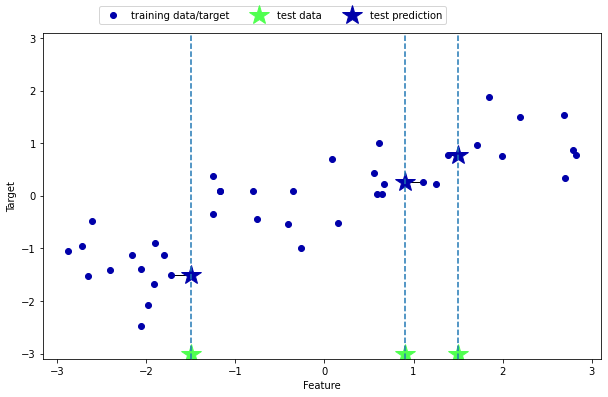

In [11]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

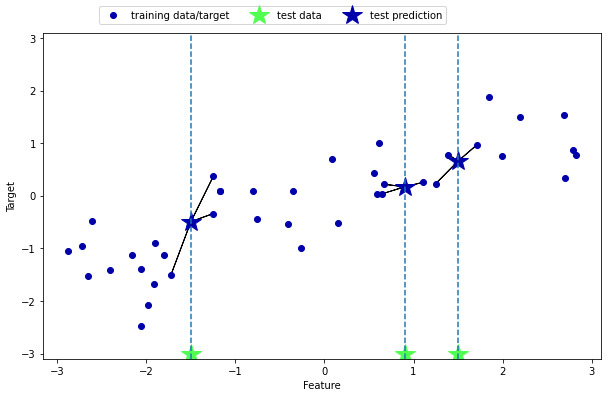

In [12]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [13]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=39)

In [15]:
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [16]:
print('Test set predictions: \n{}'.format(reg.predict(X_test)))

Test set predictions: 
[ 0.49072027  0.78686646 -1.98183861  0.00643209 -0.9859799   0.04220323
 -0.24547201  0.95346616  0.6597075  -0.24547201]


In [17]:
print('Test set R^2: {:.2f}'.format(reg.score(X_test, y_test)))

Test set R^2: 0.70


### Analyzing KNeighborsRegressor

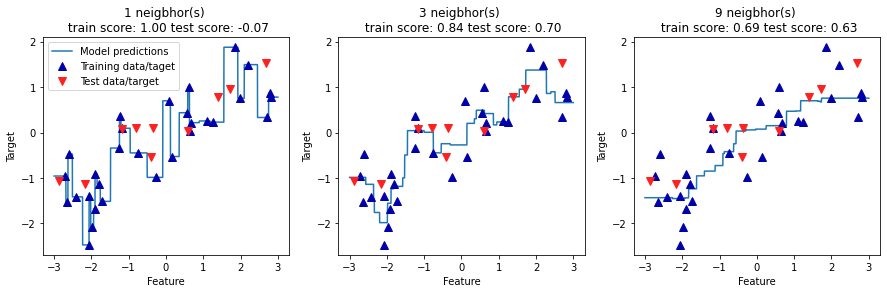

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 5000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title('{} neigbhor(s) \n train score: {:.2f} test score: {:.2f}'.format(n_neighbors, 
                                                                                   reg.score(X_train, y_train), 
                                                                                   reg.score(X_test, y_test)))
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')
axes[0].legend(['Model predictions', 'Training data/taget', 'Test data/target'], loc='best')
plt.show()

# Linear Models

## Linear models for regression

w[0]: 0.393906  b: -0.031804


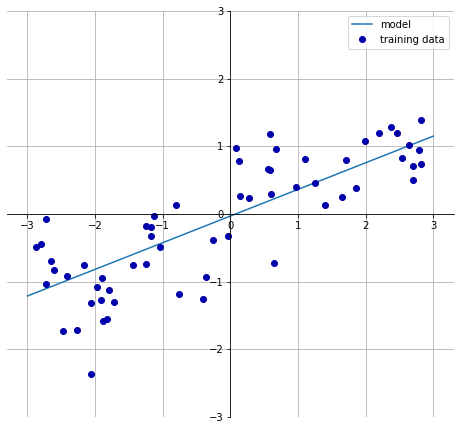

In [19]:
mglearn.plots.plot_linear_regression_wave()

### Linear regression (aka ordinary least squares)

In [20]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=39)

In [21]:
lr = LinearRegression().fit(X_train, y_train)

In [22]:
print('lr.coef_: {}'.format(lr.coef_))
print('lr.intercept_: {}'.format(lr.intercept_))

lr.coef_: [0.42418519]
lr.intercept_: -0.04775286627050278


In [23]:
print('Training set score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.67


Let’s take a look at how LinearRegression performs on a more complex dataset, like the Boston Housing dataset.

In [24]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [25]:
print('Training set score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


### Ridge regression

In [26]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [27]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge10.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [28]:
ridge01 = Ridge(alpha=.1).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge01.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


A higher alpha means a more restricted model, so we expect the entries of coef_ to have smaller magnitude for a high value of alpha than for a low value of alpha. This is confirmed in the plot in Figure 2-12

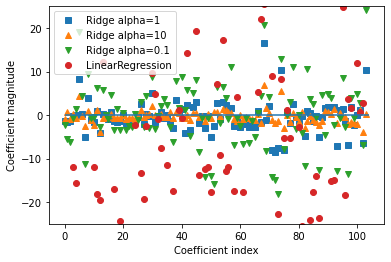

In [29]:
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')
plt.plot(lr.coef_, 'o', label='LinearRegression')

plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()

Because ridge is regularized, the training score of ridge is lower than the training score for linear regression across the board. However, the test score for ridge is better, particularly for small subsets of the data.

The lesson here is that with enough training data, regularization becomes less important, and given enough data, ridge and linear regression will have the same performance.

Another interesting aspect of Figure 2-13 is the decrease in training performance for linear regression. If more data is added, it becomes harder for a model to overfit, or memorize the data.

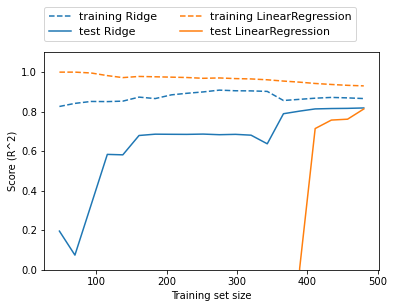

In [30]:
# 岭回归可以减少数据量的使用？
mglearn.plots.plot_ridge_n_samples()

### Lasso

In [31]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lasso.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso.score(X_test, y_test)))
print('Number of features used: {}'.format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [32]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lasso001.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso001.score(X_test, y_test)))
print('Number of features used: {}'.format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [33]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lasso00001.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso00001.score(X_test, y_test)))
print('Number of features used: {}'.format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


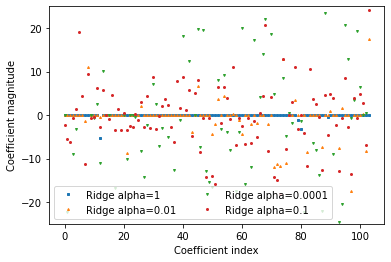

In [34]:
plt.plot(lasso.coef_, 's', markersize=2, label='Ridge alpha=1')
plt.plot(lasso001.coef_, '^', markersize=2, label='Ridge alpha=0.01')
plt.plot(lasso00001.coef_, 'v', markersize=2, label='Ridge alpha=0.0001')
plt.plot(ridge01.coef_, 'o', markersize=2, label='Ridge alpha=0.1')

plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.ylim(-25, 25)
plt.legend(ncol=2)
plt.show()

### Linear models for classification

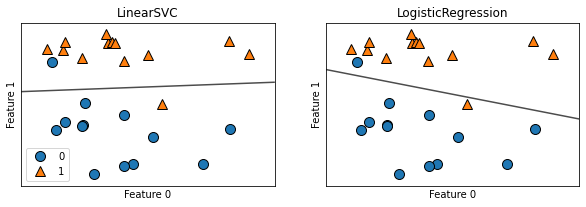

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title('{}'.format(clf.__class__.__name__))
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
    
axes[0].legend()
plt.show()

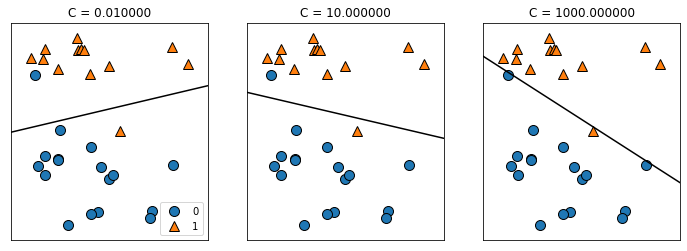

In [36]:
mglearn.plots.plot_linear_svc_regularization()

In [37]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=39)
log_reg = LogisticRegression().fit(X_train, y_train)
print('Training set score: {:.3f}'.format(log_reg.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(log_reg.score(X_test, y_test)))

Training set score: 0.948
Test set score: 0.944


In [38]:
log_reg100 = LogisticRegression(C=100).fit(X_train, y_train)
print('Training set score: {:.3f}'.format(log_reg100.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(log_reg100.score(X_test, y_test)))

Training set score: 0.951
Test set score: 0.944


In [39]:
log_reg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print('Training set score: {:.3f}'.format(log_reg001.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(log_reg001.score(X_test, y_test)))

Training set score: 0.939
Test set score: 0.916


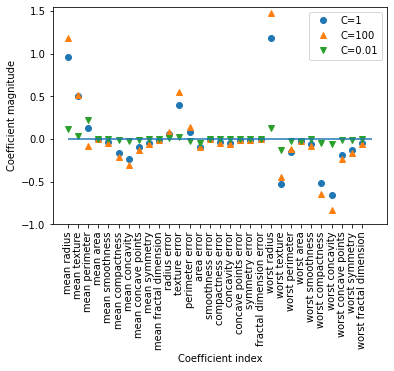

In [40]:
plt.plot(log_reg.coef_.T, 'o', label='C=1')
plt.plot(log_reg100.coef_.T, '^', label='C=100')
plt.plot(log_reg001.coef_.T, 'v', label='C=0.01')
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-1, 1.55)
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.legend()
plt.show()

Training accuracy of l1 log_reg with C=0.001: 0.92
Test accuuracy of l1 log_ref with C=0.001: 0.90
Training accuracy of l1 log_reg with C=1.000: 0.96
Test accuuracy of l1 log_ref with C=1.000: 0.96
Training accuracy of l1 log_reg with C=100.000: 1.00
Test accuuracy of l1 log_ref with C=100.000: 0.97


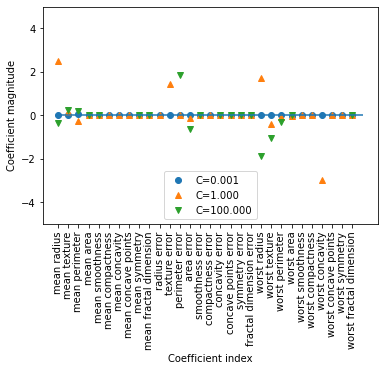

In [41]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(penalty='l1', C=C, solver='liblinear').fit(X_train, y_train)
    print('Training accuracy of l1 log_reg with C={:.3f}: {:.2f}'.format(C, lr_l1.score(X_train, y_train)))
    print('Test accuuracy of l1 log_ref with C={:.3f}: {:.2f}'.format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label='C={:.3f}'.format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.ylim(-5, 5)
plt.legend()
plt.show()

### Linear models for multiclass classification

A common technique to extend a binary classification algorithm to a multiclass classification algorithm is the one-vs.-rest approach. In the one-vs.-rest approach, a binary model is learned for each class that tries to separate that class from all of the other classes, resulting in as many binary models as there are classes. To make a prediction, all binary classifiers are run on a test point. The classifier that has the highest score on its single class “wins,” and this class label is returned as the prediction.

In [42]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)

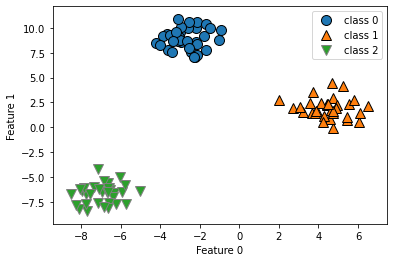

In [43]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['class 0', 'class 1', 'class 2'])
plt.show()

In [44]:
linear_svc = LinearSVC().fit(X, y)
print('Coefficient shape:', linear_svc.coef_.shape)
print('Intercept shape: ', linear_svc.intercept_.shape)

Coefficient shape: (3, 2)
Intercept shape:  (3,)


In [45]:
linear_svc.coef_

array([[-0.17492908,  0.23140625],
       [ 0.4762261 , -0.06937064],
       [-0.18914209, -0.203998  ]])

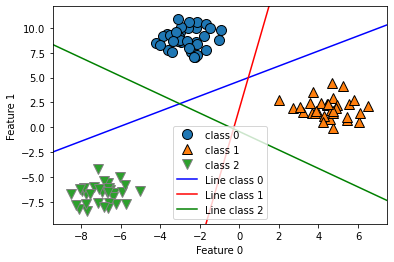

In [46]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svc.coef_, linear_svc.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line*coef[0] + intercept) / coef[1], c=color)
# plt.ylim(-15, 10)
# plt.xlim(-2, 8)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['class 0', 'class 1', 'class 2', 'Line class 0', 'Line class 1', 'Line class 2'])
plt.show()

But what about the triangle in the middle of the plot? All three binary classifiers classify points there as “rest.” Which class would a point there be assigned to? The answer is the one with the highest value for the classification formula: the class of the closest line.

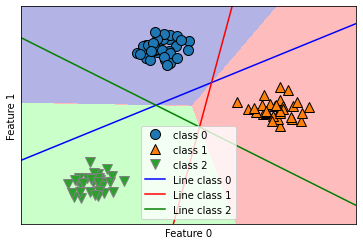

In [47]:
mglearn.plots.plot_2d_classification(linear_svc, X, fill=True, alpha=.3)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svc.coef_, linear_svc.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line*coef[0] + intercept) / coef[1], c=color)
# plt.ylim(-15, 10)
# plt.xlim(-2, 8)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['class 0', 'class 1', 'class 2', 'Line class 0', 'Line class 1', 'Line class 2'])
plt.show()

# Naive Bayes Classifiers

In [48]:
X = np.array([[0, 1, 0, 1], 
              [1, 0, 1, 1], 
              [0, 0, 0, 1], 
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [49]:
counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)
print('Feature counts: \n{}'.format(counts))

Feature counts: 
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


# Decision Trees

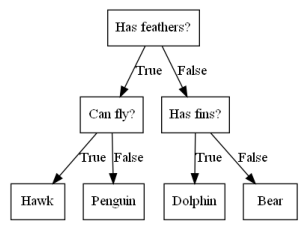

In [50]:
mglearn.plots.plot_animal_tree()

In [240]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=39)
tree = DecisionTreeClassifier(random_state=39)
tree.fit(X_train, y_train)
print('Accuracy on training set: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.944
